In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
recruitment = pd.read_csv('/content/recruitment_data.csv')
recruitment.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
recruitment.shape

(1500, 11)

In [4]:
recruitment.isnull().sum()

,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0
RecruitmentStrategy,0


In [5]:
recruitment.dtypes

,0
Age,int64
Gender,int64
EducationLevel,int64
ExperienceYears,int64
PreviousCompanies,int64
DistanceFromCompany,float64
InterviewScore,int64
SkillScore,int64
PersonalityScore,int64
RecruitmentStrategy,int64


In [6]:
recruitment.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


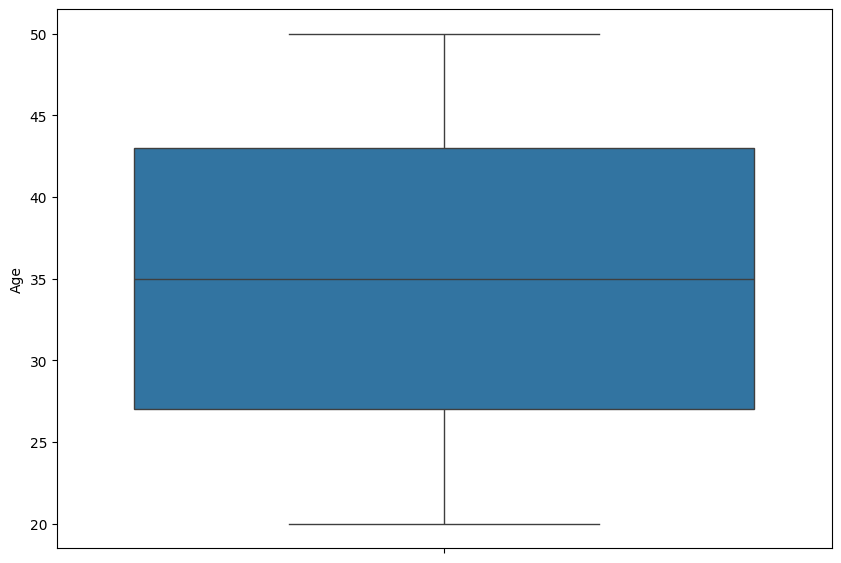

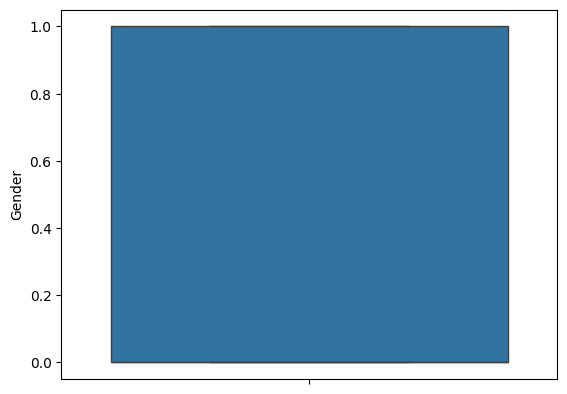

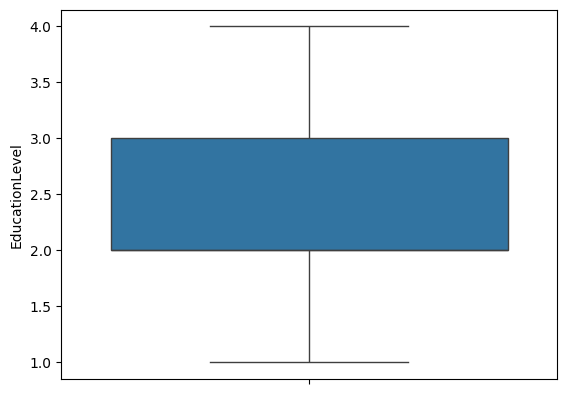

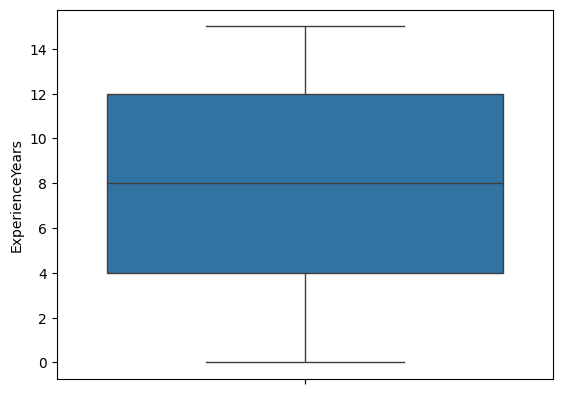

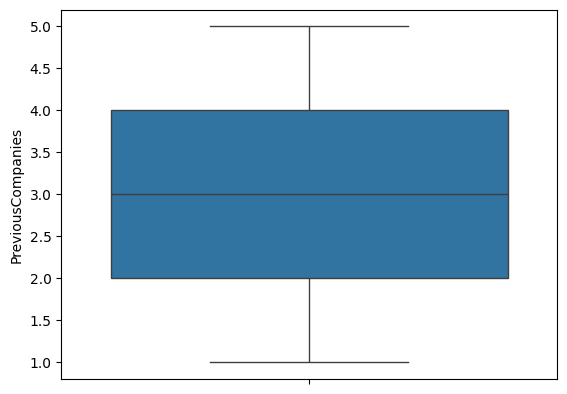

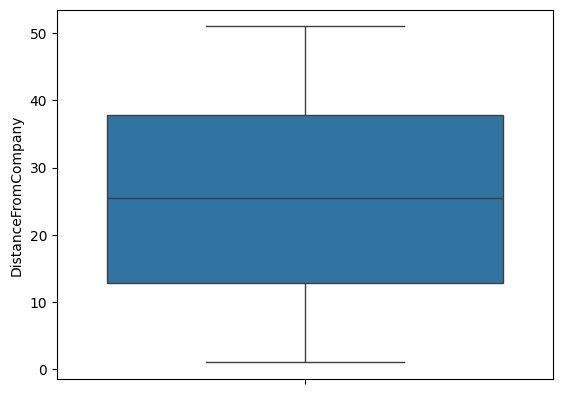

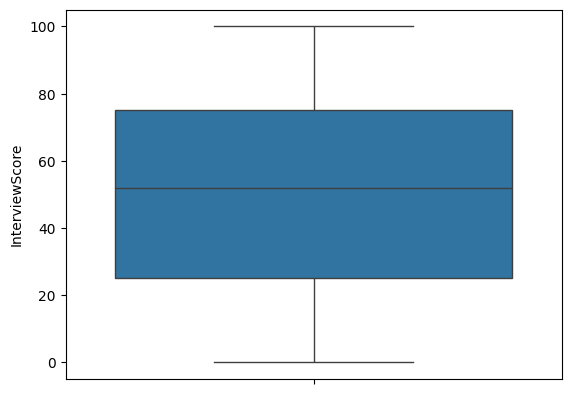

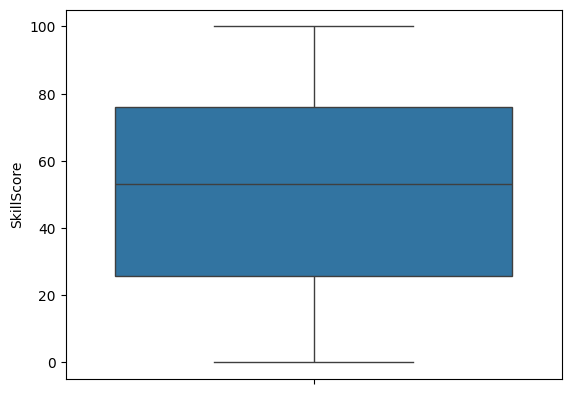

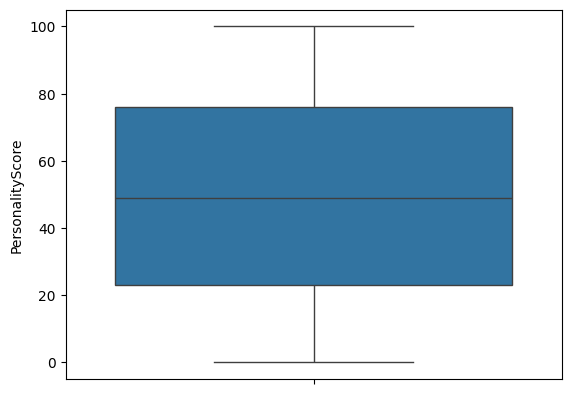

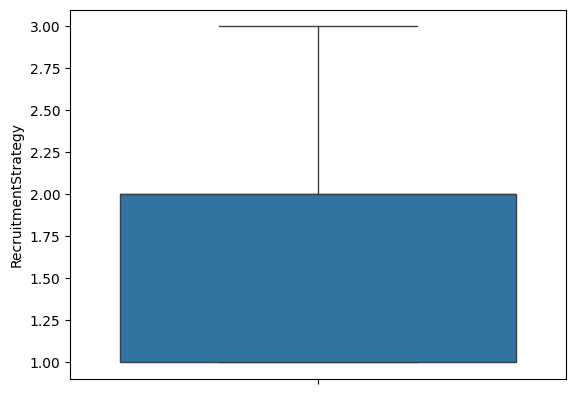

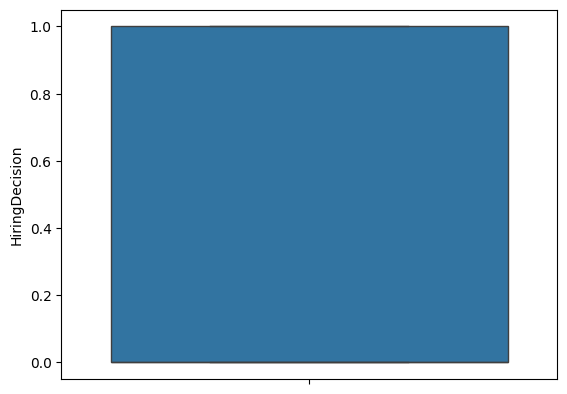

In [7]:
plt.figure(figsize=(10, 7))

for col in recruitment.select_dtypes([int,float]).columns:
  sns.boxplot(recruitment[col])
  plt.show()


In [8]:
corr_matrix = recruitment.select_dtypes([int, float]).corr()
print(corr_matrix)

                          Age    Gender  EducationLevel  ExperienceYears  \
Age                  1.000000  0.011286        0.032610         0.024780   
Gender               0.011286  1.000000        0.009676        -0.028502   
EducationLevel       0.032610  0.009676        1.000000        -0.000951   
ExperienceYears      0.024780 -0.028502       -0.000951         1.000000   
PreviousCompanies   -0.032580 -0.061915        0.007367         0.015784   
DistanceFromCompany -0.021031  0.003822        0.020600         0.007920   
InterviewScore      -0.025579 -0.020887        0.012807        -0.051701   
SkillScore          -0.008068  0.012333       -0.043367         0.006323   
PersonalityScore     0.037727  0.023729        0.031115         0.013891   
RecruitmentStrategy  0.018064 -0.023753       -0.036923         0.029603   
HiringDecision       0.001850 -0.002249        0.236710         0.122494   

                     PreviousCompanies  DistanceFromCompany  InterviewScore  \
Age     

# Split the Data

In [9]:
x = recruitment.drop(columns = ['HiringDecision'])
y = recruitment['HiringDecision']

In [10]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8)

# Model Selection

In [11]:
def eval_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  print('Training Score: ', model.score(xtrain, ytrain))
  print('Testing Score: ', model.score(xtest, ytest))

# LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

eval_model(LogisticRegression(), xtrain, ytrain, xtest, ytest)

Training Score:  0.8716666666666667
Testing Score:  0.84


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

eval_model(DecisionTreeClassifier(), xtrain, ytrain, xtest, ytest)

Training Score:  1.0
Testing Score:  0.9033333333333333


# KNeighboursClassifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

eval_model(KNeighborsClassifier(), xtrain, ytrain, xtest, ytest)

Training Score:  0.78
Testing Score:  0.67


# SVC

In [15]:
from sklearn.svm import SVC

eval_model(SVC(), xtrain, ytrain, xtest, ytest)

Training Score:  0.7233333333333334
Testing Score:  0.69


# GaussianNb

In [16]:
from sklearn.naive_bayes import GaussianNB

eval_model(GaussianNB(), xtrain, ytrain, xtest, ytest)

Training Score:  0.8791666666666667
Testing Score:  0.87


# RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

eval_model(RandomForestClassifier(), xtrain, ytrain, xtest, ytest)

Training Score:  1.0
Testing Score:  0.93


# GradientBoostingClassifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

eval_model(GradientBoostingClassifier(), xtrain, ytrain, xtest, ytest)

Training Score:  0.9683333333333334
Testing Score:  0.9266666666666666


# Model Training

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

# Model Evaluation

In [20]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       825
           1       1.00      1.00      1.00       375

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [22]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       210
           1       0.93      0.84      0.88        90

    accuracy                           0.93       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.93      0.93      0.93       300



In [23]:
import pandas as pd
import seaborn as sns

<ipython-input-24-fcc0d8427a2c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


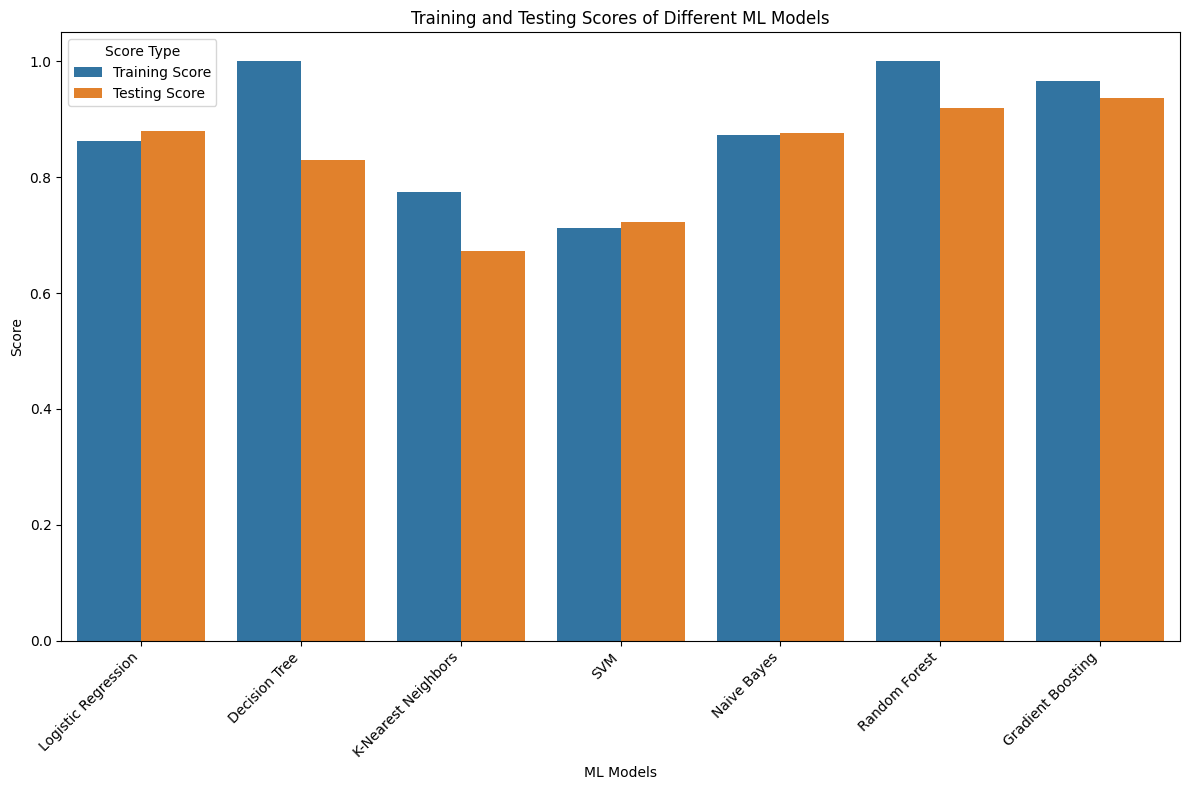

In [24]:
import matplotlib.pyplot as plt
model_scores = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes', 'Random Forest', 'Gradient Boosting'],
    'Training Score': [0.8617, 1.0, 0.7742, 0.7125, 0.8733, 1.0, 0.9658],
    'Testing Score': [0.88, 0.83, 0.6733, 0.7233, 0.8767, 0.92, 0.9367]
}
scores_df = pd.DataFrame(model_scores)
scores_melted = pd.melt(scores_df, id_vars=['Model'], var_name='Score Type', value_name='Score')
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Model', y='Score', hue='Score Type', data=scores_melted)
bar_plot.set_title('Training and Testing Scores of Different ML Models')
bar_plot.set_xlabel('ML Models')
bar_plot.set_ylabel('Score')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()